Face Recognition using face_recognition library

Dataset used contains ~750 faces images, there are total 5 faces and each face has ~150 images in the dataset.
* Make Dataset.
* Sample result.
* Make Embeddings.
* Predict Result.

In [ ]:
!pip3 install face_recognition

     |████████████████████████████████| 100.2MB 41kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=5cd4ce27b9f7405d6d671317f43ee50719dda3b8f268277dbe1204210ae2cd41
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [ ]:
import numpy as np
import dlib
import face_recognition
import os
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
rars = ['/content/drive/My Drive/Datasets/gates.rar','/content/drive/My Drive/Datasets/jack.rar',
 '/content/drive/My Drive/Datasets/modi.rar', '/content/drive/My Drive/Datasets/musk.rar',
 '/content/drive/My Drive/Datasets/trump.rar']

In [ ]:
!pip install patool

     |████████████████████████████████| 81kB 2.3MB/s 


In [ ]:
import patoolib
for rar in rars:
  patoolib.extract_archive(rar, 
                         outdir="/content/")

patool: Extracting /content/drive/My Drive/Datasets/gates.rar ...
patool: running /usr/bin/unrar x -- "/content/drive/My Drive/Datasets/gates.rar"
patool:     with cwd='/content/'
patool: ... /content/drive/My Drive/Datasets/gates.rar extracted to `/content/'.
patool: Extracting /content/drive/My Drive/Datasets/jack.rar ...
patool: running /usr/bin/unrar x -- "/content/drive/My Drive/Datasets/jack.rar"
patool:     with cwd='/content/'
patool: ... /content/drive/My Drive/Datasets/jack.rar extracted to `/content/'.
patool: Extracting /content/drive/My Drive/Datasets/modi.rar ...
patool: running /usr/bin/unrar x -- "/content/drive/My Drive/Datasets/modi.rar"
patool:     with cwd='/content/'
patool: ... /content/drive/My Drive/Datasets/modi.rar extracted to `/content/'.
patool: Extracting /content/drive/My Drive/Datasets/musk.rar ...
patool: running /usr/bin/unrar x -- "/content/drive/My Drive/Datasets/musk.rar"
patool:     with cwd='/content/'
patool: ... /content/drive/My Drive/Datasets/

Sample output 

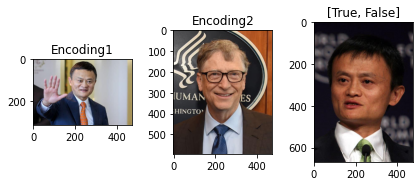

In [ ]:
face1 = face_recognition.load_image_file('/content/jack/jack10.jpg')
face2 = face_recognition.load_image_file('/content/gates/gates1.jpg')
face3 = face_recognition.load_image_file('/content/jack/jack1.jpg')

face_encd1 = face_recognition.face_encodings(face1)[0]
face_encd2 = face_recognition.face_encodings(face2)[0]
face_encd3 = face_recognition.face_encodings(face3)[0]

faces = {'Encoding1': face1, 'Encoding2': face2, 'Predited': face3}
encd = face_recognition.compare_faces([face_encd1, face_encd2], face_encd3)
f, axs = plt.subplots(1,3)
plt.tight_layout()
for i, key in enumerate(faces.keys()):
  axs[i].imshow(faces[key])
  axs[i].set_title(key)
  if i ==2: 
     axs[i].set_title(encd)

Make Embeddings


In [ ]:
# create 5 encodings(1 per subject) and compare with random faces from dataset

face1 = face_recognition.load_image_file('/content/jack/jack10.jpg')
face2 = face_recognition.load_image_file('/content/gates/gates1.jpg')
face3 = face_recognition.load_image_file('/content/modi/modi103.jpg')
face4 = face_recognition.load_image_file('/content/musk/musk104.jpg')
face5 = face_recognition.load_image_file('/content/trump/donald trump speech106.jpg')

random_face1 = face_recognition.load_image_file('/content/jack/jack109.jpg')
random_face2 = face_recognition.load_image_file('/content/gates/gates123.jpg')
random_face3 = face_recognition.load_image_file('/content/musk/musk121.jpg')

face_encd1 = face_recognition.face_encodings(face1)[0]
face_encd2 = face_recognition.face_encodings(face2)[0]
face_encd3 = face_recognition.face_encodings(face3)[0]
face_encd4 = face_recognition.face_encodings(face4)[0]
face_encd5 = face_recognition.face_encodings(face5)[0]

rnd_encd1 = face_recognition.face_encodings(random_face1)[0]
rnd_encd2 = face_recognition.face_encodings(random_face2)[0]
rnd_encd3 = face_recognition.face_encodings(random_face3)[0]

faces = [face_encd1,face_encd2,face_encd3,face_encd4,face_encd5]

encd1 = face_recognition.compare_faces(faces, rnd_encd1)
encd2 = face_recognition.compare_faces(faces, rnd_encd2)
encd3 = face_recognition.compare_faces(faces, rnd_encd3)

print('actual 1',encd1)
print('actual 2',encd2)
print('actual 4',encd3)

actual 1 [True, False, False, False, False]
actual 2 [False, True, False, False, False]
actual 4 [False, False, False, True, False]


Wow! just legit. With only single face encodings the results were accurate.

In [ ]:
flds = ['/content/gates/', '/content/jack/', '/content/modi/', '/content/trump/', '/content/musk/']
print('Number of images per subject')
print('Bill Gates',len(os.listdir(flds[0])))
print('Jack Ma',len(os.listdir(flds[1])))
print('Narendra Modi',len(os.listdir(flds[2])))
print('Donald Trump',len(os.listdir(flds[3])))
print('Elon Musk',len(os.listdir(flds[4])))

Number of images per subject
Bill Gates 150
Jack Ma 150
Narendra Modi 150
Donald Trump 151
Elon Musk 150


In [ ]:
# create face embeddings

embeddings = [] # store all embeddings
cl_lm = [] # per class number dist
pat = r'(\w+)\.jpg' # could've been easier with try catch

for fld in flds:
  for img in os.listdir(fld):
    res = re.search(pat, img)
    if res is not None:
      try:
        image = face_recognition.load_image_file(fld+img)
        # it was giving an error becuase some images do have 2 faces in it. so we only pick one
        face_encodings = face_recognition.face_encodings(image)[0] # to 128 encodings of single face
      except:
        continue
      embeddings.append(face_encodings)
  print(len(embeddings)) # count how many faces we added per class
  cl_lm.append(len(embeddings)) # make not for making Y

145
279
418
562
710


In [ ]:
# make y using cl_lm

Y = np.zeros(len(embeddings))
Y[:cl_lm[0]] = 1
Y[cl_lm[0]:cl_lm[1]] = 2
Y[cl_lm[1]:cl_lm[2]] = 3
Y[cl_lm[2]:cl_lm[3]] = 4
Y[cl_lm[3]:cl_lm[4]] = 5

In [ ]:
print(len(embeddings)) # for some reason, maybe its the output from face_encoding is causing problem
# number of faces are more than 1 in some images so embedding are also more than one
print(len(Y)) # this is correct

757
751


In [ ]:
# new embeds

print(len(embeddings))
print(len(Y)) 

710
710


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(embeddings, Y, test_size=0.2)

Predict Result

In [ ]:
# predict using all embeddings(710)

yhats = []
correct = 0
yhat = 0

def predict_results(result):
  ids = [i for i, val in enumerate(result) if val] 
  values, counts = np.unique(Y[ids], return_counts=True)
  yhat = values[np.argmax(counts)]
  return yhat

for test_embedding, y in zip(X_test, Y_test):

  result = face_recognition.compare_faces(embeddings, test_embedding) # a big bool array of 710
  yhat = predict_results(result)
  yhats.append(yhat)
  if yhat == y:
    correct+=1
print('Using all embeddings')
print('{0} correct out of {1}'.format(correct, len(Y_test)))

Using all embeddings
139 correct out of 142


In [ ]:
len(faces) # reminder

5

In [ ]:
# predict with only 5 embeddings

correct = 0
yhat = 0

for test_embedding, y in zip(X_test, Y_test):

  result = face_recognition.compare_faces(faces, test_embedding)
  yhat = [i for i,val in enumerate(result) if val]
  if yhat:
    if yhat == y:
      correct+=1
print('using 5 faces embedding')
print('{0} correct out of {1}'.format(correct, len(Y_test)))

using 5 faces embedding
56 correct out of 142
